<div class="w3-bar w3-blue-grey w3-padding">
    <h2 class="w3-bar-item w3-padding-32"><!-- Text Here --></h2>
    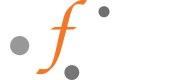
</div>

# Further applications of perturbation theory

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Overview%3A%0A"><i class="fa fa-file-o"></i> Overview:
</h3>
    <ul>
<li><strong>Teaching:</strong> 20 min</li>
<li><strong>Exercises:</strong> 15 min</li>
</ul>
<p><strong>Questions</strong></p>
<ul>
<li>How can perturbation theory be used to find wavefunctions?</li>
<li>How do I visualise a probability density distribution?</li>
</ul>
<p><strong>Objectives</strong></p>
<ul>
<li>Investigate how perturbation theory can be applied to wavefunctions.</li>
<li>Understand that a visualisation can be made more powerful through the use of widgets.</li>
</ul>
</div>

<div class="w3-panel w3-leftbar w3-border-blue w3-pale-blue w3-padding-small">
    <h3 id="-Import-Necessary-Libraries%0A"><i class="fa fa-info-circle"></i> Import Necessary Libraries
</h3>
    <p>Alongside the libraries imported in the previous sections, we will now need to import the <code>ipywidgets</code> library so that we can make use of widgets in our plots later on.</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from ipywidgets import interact, fixed
import ipywidgets as widgets

e = 1.6 * 10**(-19) #an electron volt
hbar = 1.05 * 10**(-34) 
m =  9.11 * 10**(-31)

L = 10**(-10) #width of the infinite well
w = 0.2*L #width of the perturbation
Nx = 100 #number of x-positions over which we will sample the wavefunction
xstep = L / Nx #step in x values

nmax = 1000 #number of x-positions over which we will sample the square perturbation. Very high for plotting purposes

Vmax = 1000 * e #the maximum perturbation magnitude we will sample
NV = 10 #number of perturbation magnitudes we will sample
Vstep = Vmax / NV #step in perturbation magnitude

## An example - Square perturbation in an infinite well
### Energy

Having studied the impacts of perturbations on the energy of a system in the previous chapter, we will now look at finding the first-order correction to the wavefunction of the same system. We know that this is 

$$
\bigl|\psi_{1n}\bigl> = \sum_{k\neq n}\frac{\bigl<\psi_{0k}\bigl|\hat{H}^{'}\bigl|\psi_{0n}\bigl>}{E_{0n} - E_{0k}}\bigl|\psi_{0k}\bigl>.
\tag{1}
$$

Here $n$ represents the principle quantum number and $k$ is a dummy variable, which is used to sum over various quantum states. Clearly this equation is more complicated than the first-order correction to the energy as we sum over various quantum states and must find the new wavefunction for various positions.

Below are a series of functions, which result in the plot of the wavefunction as a function of position for any quantum state and any perturbation magnitude. Note that we only sum over a limited number of $\bigl|\psi_{0k}\bigl>$'s, to strike a compromise between the accuracy of the wavefunction and the time it would take for the computation to be made. 

There are a lot of functions used so they have been broken up into smaller cell blocks so that they can be more easily interpreted. The first three functions form the individual steps involved in the maths of calculating the perturbed wavefunction. Firstly we have a function to calculate the integral, which features as the numerator in  equation 1. It can be found for different values of $k$, which will be useful when we want to sum over different quantum states.

The second function calculates the value of the first term in the sum for individual values of *k*. We then store these in an array so that they can later be called individually when we multiply them by the wavefunction associated with the kth quantum state. Note that we store these values in an array now because they are fixed, unlike the wavefunction associated with the kth quantum state, which is a function of position.

The third function creates an array which stores the values of the perturbed wavefunction as a function of position. We require a 'nested for loop' so that we can calculate values of the perturbed wavefunction at individual positions after summing over all values of *k*.

In [2]:
def psi(n, x):
    """
    Computes the value of the n'th wavefunction at a position x, using the analytic solution 
    to the Schrodinger equation for an infinite potential well.
    
    Returns:
        float
            The value of the wavefunction at x
        
    Parameters:
        x : float
            The x coordinate of the system
        
        n : integer
            Describes which state the wavefunction is in
    """
    
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)

def energy(n):
    """
    Function to calculate the energy of the particle in an infinite 
    potential well in a particular quantum state
    
    Returns:
        energy : float
                 the energy of the particle in joules
                 
    Parameter:
        n : integer
            the state of the wavefunction
    """
    
    energy = (n**2 * (np.pi)**2 * (hbar**2)) / (2 * m * L**2)
    return energy / e

def integral(n, k, V, w):
    """
    Function to calculate individual integrals, which will later be summed when finding the first-order
    correction to the wavefunction.
    
    Returns:
        perturb_1[0] : float
                       the value of the integral (perturb_1[1] is the estimated error in the integral)
    Parameters:
        n : integer
            principle quantum number
            
        k : integer
            dummy variable. represents the principle quantum number and is what we will sum over in a later function
        
        V : float
            magnitude of the square perturbation
            
        w : float
            width of the square perturbation
    """
    
    if w > L:
        print ("Perturbation width exceeds that of the infinite well. Reduce perturbation width.")
        
    else:
        def integrand(x):
            """
            Function to establish the integrand to be used when calculating the perturbation. Must do this 
            as cannot square the 'psi' function which is previously defined
            """
            
            return V * abs(psi(n, x))**2
        
        perturb_1 = quad(integrand, (L - w) / 2, (L + w) / 2)
        return perturb_1[0] / e
    
def sum_1(n, kmax, V, w):
    """
    Function to store integral values which will later be used to find the value of the corrected wavefunction.
    
    Returns:
        sum_1 : array
                array containing coefficients which will be used to find the corrected wavefunction.
        
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        V : float
            magnitude of the square perturbation
        
        w : float
            width of the square perturbation
    """
    sum_1 = np.empty(kmax)
    
    for i in range(0, kmax):
        if i == n - 1:
            sum_1[i] = 0
        else:
            value = integral(n, i + 1, V, w) / (energy(n) - energy(i + 1))
            sum_1[i] = value
    
    return sum_1

def psi_correc(n, kmax, V, w):
    """
    A function to store the values of the (first-order) corrected wavefunction depending on the 
    specified perturbation.
    
    Returns:
        new_psi : list
                  contains the magnitude of the (first-order) corrected wavefunction for various x-positions
                  
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        V : float
            magnitude of the square perturbation
        
        w : float
            width of the square perturbation
    """
    
    new_psi = np.empty(Nx) #empty array to store (first-order) corrected wavefunctions
    
    for i in range(0, Nx):
        value = 0
        
        for j in range(0, kmax):
            value += (sum_1(n, kmax, V, w)[j] * psi(j + 1, i * xstep))
        
        new_psi[i] = value + psi(n, i * xstep)
    
    return new_psi

psi_correc(1, 10, 1000*e, w)

array([      0.        ,  -95322.14777344, -188128.44622929,
       -276038.01956064, -356930.34874547, -429052.24094909,
       -491099.02938759, -542264.69262455, -582258.03043013,
       -611284.67866243, -629997.3667178 , -639419.20080923,
       -640846.70066456, -635740.67195847, -625613.66041747,
       -611922.66548711, -595975.01471897, -578853.89817488,
       -561368.17090404, -544028.82597719, -527052.21881855,
       -510387.888932  , -493766.86781733, -476764.84250738,
       -458873.58002894, -439573.67375858, -418401.95545213,
       -395007.77761781, -369193.71036364, -340937.87531907,
       -310396.99094987, -277891.05251084, -243872.24617807,
       -208882.0524387 , -173501.41526726, -138299.2719877 ,
       -103784.63448133,  -70366.81585665,  -38327.38365041,
         -7806.10386212,   21198.34240002,   48813.58690859,
         75266.83376794,  100849.34856175,  125876.12906706,
        150645.04358067,  175399.61876683,  200299.14110581,
        225398.86901108,

The function below stores the magnitude of the perturbation as a function of position. This function will be called later when we want to plot the wavefunction so that it is easier to interpret how a change in the perturbation magnitude affects the wavefunction. We sample over many points ($nmax$) so that the lines appear vertical. 

In [3]:
nmax = 1000 #number of x-positions over which we will sample the square perturbation. Very high for plotting purposes
step = L / nmax #the increments in x-position
    
def perturbation(V, w):
    """
    A function to store the perturbation.
    
    Returns:
        perturb : array
                  stores individual values of the perturbation over a range of positions.
                  
    Parameters:
        V : float
            magnitude of the square perturbation
        
        w : float
            width of the square perturbation
    """
    
    perturb = np.empty(nmax) #random array to fill with values of the perturbation depending on arguments
    
    if w == 0:
        perturb = np.zeros(nmax)
    else:
        for i in range(0, nmax):
            if (i * step) < ((L - w) / 2) or (i * step) > ((L + w) / 2):
                perturb[i] = 0
            else:
                perturb[i] = V
    return perturb

perturbation(1000, w)

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

The function below allows us to plot the corrected wavefunction as a function of position. We also have a plot of the perturbation alongside the energy of the system, so that we can compare the two - it may become significant when the perturbation magnitude exceeds the energy...

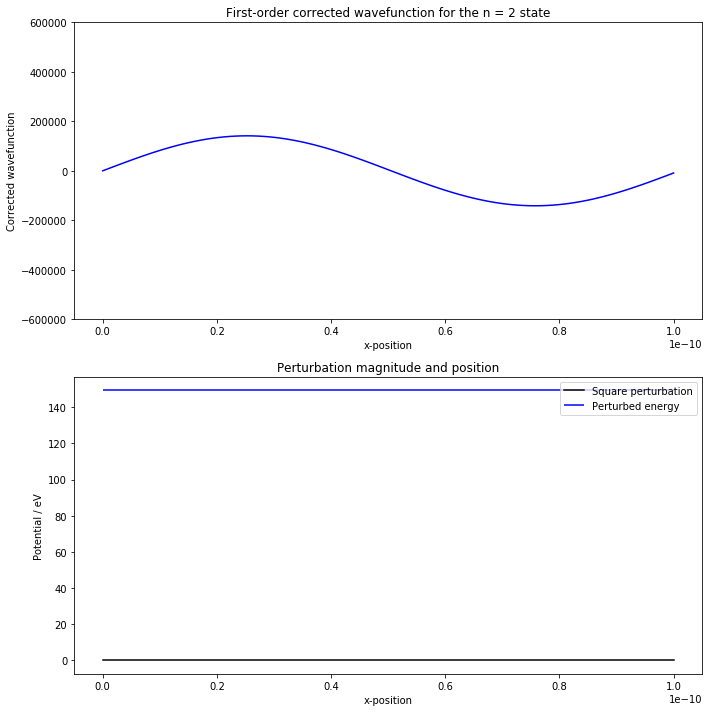

In [4]:
#specify constants
Nx = 100 #number of x-positions over which we will sample the wavefunction
xstep = L / Nx #step in x values

def energy_correc(n, V, w):
    """
    Function to calculate the total energy of the system with a square perturbation at the centre of an 
    infinite potential well
    
    Returns:
        new_E : float
                the corrected total energy
    Parameters:
        w : float
            width of the square perturbation
            
        V : float
               the square perturbation magnitude
               
        n : integer
            the principle quantum number
        """
    if w > L:
        print ("Perturbation width exceeds that of the infinite well. Reduce perturbation width.")
        
    else:
        def integrand(x):
            """
            Function to establish the integrand to be used when calculating the perturbation. Must do this 
            as cannot square the 'psi' function which is previously defined
            """
            
            return V * abs(psi(n, x))**2
        
        perturb_1 = quad(integrand, L/2 - w/2, L/2 + w/2)
        
        #the 'quad' function outputs a list with two elements - the integral and the estimated error in the integral.
        #we only want the first element of the list (the integral value)
        new_E = (energy(n) + perturb_1[0])
    return new_E

@interact(n = (1, 3, 1), kmax = fixed(10), V = (-4e3, 4e3, 1e2), w = fixed(0.2 * L))
def plot_psi(n, kmax, V, w):
    """
    A function to plot the (first-order) corrected wavefunction for an infinite well containing
    a perturbation.
    
    Returns:
        a plot of the wavefunction magnitude against position
      
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
               
        V : float
            magnitude of the square perturbation
        
        w : float
            width of the square perturbation
    """
    
    x_pos1 = np.linspace(0, L, Nx)
    
    #set the size of the figures
    fig, (ax1, ax2) = plt.subplots(2, figsize = (10, 10)) 
    
    #general plot formatting
    ax1.plot(x_pos1, psi_correc(n, kmax, V * e, w), 'b')
    ax1.set_ylim(-600000, 600000)
    ax1.set_xlabel('x-position')
    ax1.set_ylabel('Corrected wavefunction')
    ax1.set_title('First-order corrected wavefunction for the n = %i state' %n)
    
    
    x_pos2 = np.linspace(0, L, nmax)
    ax2.plot(x_pos2, perturbation(V, w), 'k', label = 'Square perturbation')
    ax2.hlines(energy_correc(n, V, w), 0, L, 'b', label = 'Perturbed energy')
    ax2.legend(loc = 'best')
    ax2.set_xlabel('x-position')
    ax2.set_ylabel('Potential / eV')
    ax2.set_title('Perturbation magnitude and position')
    
    fig.tight_layout() #increase the gap between subplots
    return plt.show()

## Information - Tip

##### Widgets

Note that the **ipywidgets** library has also been imported to allow the use of widgets, which make it easier to visualise the effect of changing a certain argument. When widgets are used, there is no need to for the function to create the plot to be called. Instead, a line is inserted directly above the appropriate function with the key phrase **@interact(*relevant arguments*)**. The range over which we want to sample must be specified for every argument of the function. We can also specify the increments we would like to sample over. If we want to keep an argument fixed, we simply use the keyword **fixed** followed by the appropriate value.

<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3 id="-Widgets-%0A"><i class="fa fa-pencil-square-o"></i> Widgets
</h3>
    <p>Have a play around with the widgets and note the significance of raising the perturbation magnitude above the energy of the system.</p>
</div>

<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3 id="-Probability-density-distribution%0A"><i class="fa fa-pencil-square-o"></i> Probability density distribution
</h3>
    <p>A more intuitive plot is the probability density against position. Now write two or more (or fewer!) functions, which will generate a plot of the probability density against position. Try to implement widgets for this plot. Note again the significance of raising the perturbation magnitude above the energy of the system.</p>
<p>Think of a way of checking that your probability density distribution is correct (you may find the <strong>numpy.trapz</strong> function helpful!) What happens when the perturbation magnitude is made very large? Can you think why this might be?</p>
</div>

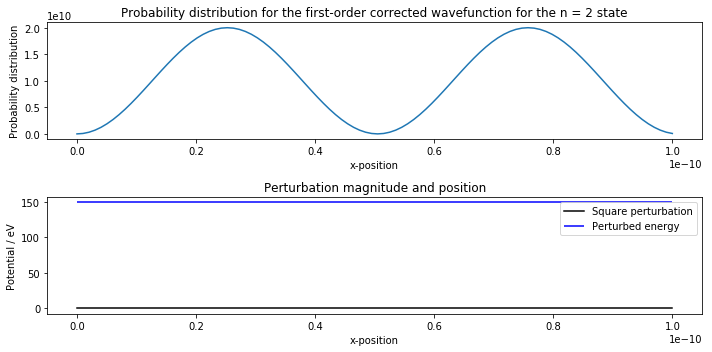

In [5]:
def prob_dens(n, kmax, V, w):
    """
    Function to store values of the probability density distribution.
    
    Returns:
        prob : list
               stores individual values of the probability density over a range of positions.
               
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        V : float
            magnitude of the square perturbation
        
        w : float
            width of the square perturbation
    """
    
    prob = np.empty(Nx)
    psi = psi_correc(n, kmax, V * e, w)
    
    for i in range(0, Nx):
        prob[i] = abs(psi[i])**2
    
    return prob

@interact(n = (1, 3, 1), kmax = fixed(10), V = (-4e3, 4e3, 1e2), w = fixed(0.2 * L))
def plot_prob_dens(n, kmax, V, w):
    """
    A function to plot the probability density distribution as a function of position. Also plots
    the magnitude and position of the perturbation as well as the energy of the system. The parameters 
    are connected to widgets to allow better visualisation of the evolution of the function.
    
    Returns:
        plot of the probability density distribution
        plot of the square perturbation and the energy of the system
      
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        V : float
            magnitude of the square perturbation
        
        w : float
            width of the square perturbation
    """
    
    x_pos = np.linspace(0, L, Nx)
    
    fig, (ax1, ax2) = plt.subplots(2, figsize = (10, 5)) 
    
    ax1.plot(x_pos, prob_dens(n, kmax, V, w))
    ax1.set_xlabel('x-position')
    ax1.set_ylabel('Probability distribution')
    ax1.set_title('Probability distribution for the first-order corrected wavefunction for the n = %i state' %n)
    
    x_pos2 = np.linspace(0, L, nmax)
    ax2.plot(x_pos2, perturbation(V, w), 'k', label = 'Square perturbation')
    ax2.hlines(energy_correc(n, V, w), 0, L, 'b', label = 'Perturbed energy')
    ax2.legend(loc = 'best')
    ax2.set_xlabel('x-position')
    ax2.set_ylabel('Potential / eV')
    ax2.set_title('Perturbation magnitude and position')
    
    fig.tight_layout() #increase the gap between subplots
    return plt.show()

<div class="w3-bar w3-blue-grey">
<a href="./03_ipw_PT_energy.ipynb" class="w3-left-align w3-bar-item w3-button w3-mobile" style="width:33%"><h2><i class="fa fa-angle-double-left"></i> Previous</h2></a>
<a href="./00_schedule.ipynb" class="w3-bar-item w3-button w3-center w3-mobile" style="width:33%"><h2>Schedule</h2></a>
<a href="./05_ipw_PT_colour_plot.ipynb" class="w3-right-align w3-bar-item w3-button w3-right w3-mobile" style="width:33%"><h2>Next <i class="fa fa-angle-double-right"></i></h2></a>
</div>